<h1>What would be the most cost effective way to learn Data Analysis ?</h1>
    <h4>     a edX & Udemy comparison</h4>

<h3>Importing the libraries used for the project</h4>

In [1]:
import pandas as pd
import matplotlib.pylab as plt 
import numpy as np
import sqlite3
import seaborn as sns
from pathlib import Path as path

<h3>Declaring the variables for the project</h4>	

In [2]:
edx = pd.read_csv('edx_courses.csv')
udemy = pd.read_csv('udemy_courses.csv')
edx_compared_with_udemy = pd.read_csv('udemy_compared_to_edx.csv')

<h2>edx</h2>	


In [3]:
print('-- Shape of {}: '.format('edx'), edx.shape, '\n _____ \n')
print('-- Data types of {}:\n\n'.format('edx'), edx.dtypes, '\n _____ \n')
print('-- Number of unique rows {}\n\n'.format('edx'), edx.nunique())

-- Shape of edx:  (975, 16) 
 _____ 

-- Data types of edx:

 title                 object
summary               object
n_enrolled            object
course_type           object
institution           object
instructors           object
Level                 object
subject               object
language              object
subtitles             object
course_effort         object
course_length         object
price                 object
course_description    object
course_syllabus       object
course_url            object
dtype: object 
 _____ 

-- Number of unique rows edx

 title                 972
summary               887
n_enrolled            849
course_type             2
institution           111
instructors           775
Level                   3
subject                31
language                9
subtitles              33
course_effort          53
course_length          18
price                  47
course_description    932
course_syllabus       412
course_url            974
dty

In [4]:
print('-- Columns of {}:'.format('edx'), '\n', edx.columns, '\n _____ \n')
print('-- Head of {}\n\n'.format('edx'), edx.head())

-- Columns of edx: 
 Index(['title', 'summary', 'n_enrolled', 'course_type', 'institution',
       'instructors', 'Level', 'subject', 'language', 'subtitles',
       'course_effort', 'course_length', 'price', 'course_description',
       'course_syllabus', 'course_url'],
      dtype='object') 
 _____ 

-- Head of edx

                                                title  \
0                                How to Learn Online   
1  Programming for Everybody (Getting Started wit...   
2            CS50's Introduction to Computer Science   
3                                 The Analytics Edge   
4  Marketing Analytics: Marketing Measurement Str...   

                                             summary n_enrolled  \
0  Learn essential strategies for successful onli...    124,980   
1  This course is a "no prerequisite" introductio...    293,864   
2  An introduction to the intellectual enterprise...  2,442,271   
3  Through inspiring examples and stories, discov...    129,555   
4     T

In [5]:
# Are there any row without value ?
edx.isna().sum()

title                   0
summary                53
n_enrolled            120
course_type             0
institution             0
instructors             3
Level                   0
subject                 0
language                0
subtitles               3
course_effort           0
course_length           0
price                   0
course_description     40
course_syllabus       558
course_url              0
dtype: int64

It seems that:
- summary,
- n_enrolled,
- instructors, 
- subtitles, 
- course_description, 
- course_syllabus 

all have missing values.

We'll firstly need to patch those holes in the data if we want to use it for further analysis:

In [6]:
#Changing the na values into 'Unlisted'
edx.summary = edx.summary.fillna('Unlisted')
edx.n_enrolled = edx.n_enrolled.fillna(0)
edx.instructors = edx.instructors.fillna('Unlisted')
edx.subtitles = edx.subtitles.fillna('Unlisted')
edx.course_description = edx.course_description.fillna('Unlisted')
edx.course_syllabus = edx.course_syllabus.fillna('Unlisted')

Checking if I did not forget any column:

In [7]:
edx.isna().sum()

title                 0
summary               0
n_enrolled            0
course_type           0
institution           0
instructors           0
Level                 0
subject               0
language              0
subtitles             0
course_effort         0
course_length         0
price                 0
course_description    0
course_syllabus       0
course_url            0
dtype: int64

Seems good!

Now, since all the data holes are patched, I have to clean the data to create my analysis:

In [8]:
# Changing '124,980' to '124980' in the 'n_enrolled' column
edx.n_enrolled = edx.n_enrolled.str.replace(',','')

# Changing 'FREE-Add a Verified Certificate for $49 USD to 124980' to '49' in the 'price' column
edx.price = edx.price.str.replace('FREE-Add a Verified Certificate for ','')
edx.price = edx.price.str.replace('$','')
edx.price = edx.price.str.replace('USD','')

# For example: changing '2 Weeks' to '2'
edx.course_length = edx.course_length.str.replace(' Weeks', '')

/var/folders/yb/jrnqn1jx4y1561cpnnfbfc_r0000gn/T/ipykernel_53845/1443937722.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  edx.price = edx.price.str.replace('$','')


Verifying if all the changes made are done:

In [9]:
edx.head()

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,124980,Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2,49,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...",293864,Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7,49,This course aims to teach everyone the basics ...,Unlisted,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,2442271,Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12,90,"This is CS50x , Harvard University's introduct...",Unlisted,https://www.edx.org/course/cs50s-introduction-...
3,The Analytics Edge,"Through inspiring examples and stories, discov...",129555,Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13,199,"In the last decade, the amount of data availab...",Unlisted,https://www.edx.org/course/the-analytics-edge
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,81140,Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4,249,Begin your journey in a new career in marketin...,Unlisted,https://www.edx.org/course/marketing-analytics...


Seems good !

If I decide to run the next cell as is, I will have this error pop-up "ValueError: cannot convert float NaN to integer". It is because we created holes in the data by removing "FREE-Add a Verified Certificate for", "$" and "USD".

I have to fill those data holes first.

In [10]:
edx.n_enrolled = edx.n_enrolled.fillna(0)

Saving the file to excel for using it in a Tableau Dashboard

In [11]:
edx.to_excel("edx.xlsx", index=False)

Then change n_enrolled dtype to int, price dtype to float & course_length dtype to int.


In [12]:
edx.n_enrolled = edx.n_enrolled.astype(int)
edx.price = edx.price.astype(float)
edx.course_length = edx.course_length.astype(int)

edx.dtypes

title                  object
summary                object
n_enrolled              int64
course_type            object
institution            object
instructors            object
Level                  object
subject                object
language               object
subtitles              object
course_effort          object
course_length           int64
price                 float64
course_description     object
course_syllabus        object
course_url             object
dtype: object

The dtypes of the numerical data we have is now changed.

Lets focus on visualising and understanding the data we have.

To do that, I'll use MySQL queries using the sqlite3 library.

But first, I would like to understand if the numerical data I have is correlated with each other:

<AxesSubplot:>

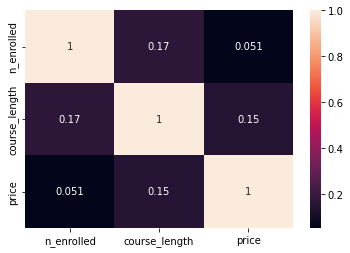

In [13]:
correlation = edx.corr()
sns.heatmap(correlation, xticklabels = correlation.columns, yticklabels = correlation.columns, annot = True, )

Price, n_enrolled or price does not seem to be correlated with one another.

In [14]:
edx_csv = edx.to_csv("edx_for_db.csv")

path('edx_course_descriptions.db').touch()

edx_conn = sqlite3.connect('edx.db')
edx_cursor = edx_conn.cursor()
edx.to_sql('edx', edx_conn, if_exists='append', index=False)

<AxesSubplot:xlabel='price', ylabel='n_enrolled'>

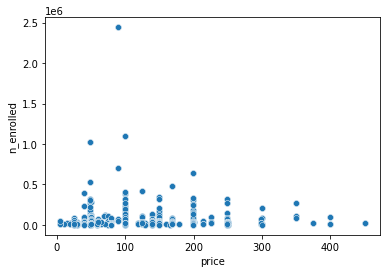

In [15]:
price_length_n_enrolled = pd.read_sql('''SELECT course_length, price, n_enrolled
                                      FROM edx''', edx_conn)

sns.scatterplot(x = 'price', y = 'n_enrolled', data = price_length_n_enrolled)

What institution is the most profitable using edX ?

<AxesSubplot:xlabel='profit', ylabel='institution'>

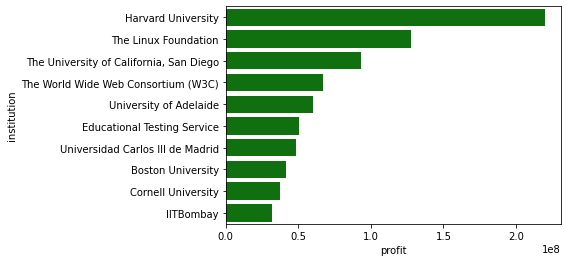

In [16]:
profit_table = pd.read_sql('''SELECT institution, price*n_enrolled as profit
                              FROM edx 
                              GROUP BY institution
                              ORDER BY profit DESC
                              LIMIT 10''', edx_conn)
sns.barplot(x = 'profit', y = 'institution', data = profit_table , color = 'green')


Is the average price a more important metric or is the number of user one ?

<AxesSubplot:xlabel='avg_price', ylabel='profit'>

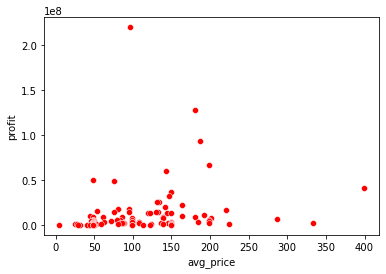

In [17]:
profit_avg_price = pd.read_sql('''SELECT institution, price*n_enrolled as profit, AVG(price) as avg_price
                              FROM edx 
                              GROUP BY institution
                              ORDER BY profit DESC''', edx_conn)

sns.scatterplot(x = 'avg_price', y = 'profit', data = profit_avg_price , color = 'red')

<AxesSubplot:xlabel='n_enrolled', ylabel='profit'>

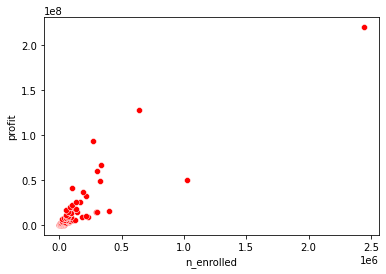

In [18]:
profit_n_enrolled = pd.read_sql('''SELECT institution, price*n_enrolled as profit, n_enrolled
                              FROM edx 
                              GROUP BY institution
                              ORDER BY profit''', edx_conn)

sns.scatterplot(x = 'n_enrolled', y = 'profit', data = profit_n_enrolled , color = 'red')

AttributeError: 'FacetGrid' object has no attribute 'set_yscale'

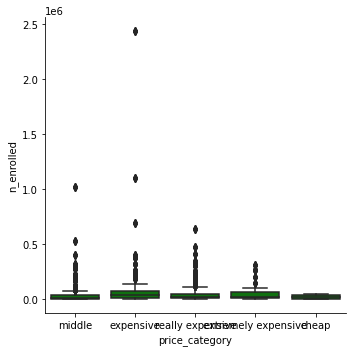

In [19]:
price_n_enrolled = pd.read_sql('''SELECT institution, price, n_enrolled,
                                CASE
                                    WHEN price BETWEEN 0 AND 20 THEN 'cheap'
                                    WHEN price BETWEEN 20 AND 50 THEN 'middle'
                                    WHEN price BETWEEN 50 AND 100 THEN 'expensive'
                                    WHEN price BETWEEN 100 AND 200 THEN 'really expensive'
                                    ELSE 'extremely expensive'
                                END AS 'price_category'
                              FROM edx''', edx_conn)

graph = sns.catplot(x = 'price_category', y = 'n_enrolled', data = price_n_enrolled , color = 'green', kind ="box")
graph.set_yscale("log")


In [ ]:
sns.scatterplot(x = 'price', y = 'course_length', data = price_length_n_enrolled)

In [ ]:
data_analytics = pd.read_sql('''SELECT MAX(price), MIN(price)
                                      FROM edx
                                      WHERE subject LIKE '%Data Analysis%'
                                      ORDER BY price DESC LIMIT 10 ''', edx_conn)
data_analytics

It's interesting to see that the price range of the courses range from 25 - $350 USD. What would explain such a range?

What would be increasing the price if it not for the number of enrolees or the length of the course?

In [ ]:
data_analytics_grouped_by_price = pd.read_sql(
''' SELECT title, price, institution, level
    FROM edx
    WHERE subject LIKE "%Data%"
    GROUP BY price''', edx_conn)

data_analytics_grouped_by_price

In [ ]:
sns.barplot(x = 'price', y = 'institution', data = data_analytics_grouped_by_price , color = 'blue', edgecolor='white', ci=False)

In [ ]:
sns.barplot(x = 'price', y = 'Level', data = data_analytics_grouped_by_price , color = 'blue', edgecolor='white', ci=False)


It seems its both the name of the institution and the associated level that is making the price go up.

What is the institution that has made most of edx data courses?

In [ ]:
data_courses_grouped_by_institution = pd.read_sql(
''' SELECT institution, COUNT(title) AS number_of_courses
    FROM edx
    WHERE subject LIKE "%Data%"
    GROUP BY institution
    ORDER BY number_of_courses''', edx_conn)

data_courses_grouped_by_institution

In [ ]:
sns.barplot(x = 'number_of_courses', y = 'institution', data = data_courses_grouped_by_institution , color = 'blue', edgecolor='white', ci=False)

What's the institution that has the higher average_price for its courses?

In [ ]:
data_courses_grouped_by_institution_ordered_by_avg_price = pd.read_sql(
''' SELECT institution, COUNT(title) AS number_of_courses, AVG(price) as average_price
    FROM edx
    WHERE subject LIKE "%Data%"
    GROUP BY institution
    ORDER BY average_price''', edx_conn)

data_courses_grouped_by_institution_ordered_by_avg_price

In [ ]:
sns.barplot(x = 'average_price', y = 'institution', data = data_courses_grouped_by_institution_ordered_by_avg_price , color = 'blue', edgecolor='white', ci=False)

How many Data Courses are there in the edX catalogue?
What does that mean in % ?

In [ ]:
number_of_data_courses = pd.read_sql(
''' SELECT COUNT(*) as number_of_data_courses
    FROM edx
    WHERE title LIKE "%Data%" OR "%data%"''', edx_conn)

number_of_data_courses

In [ ]:
percentage_of_data_courses = pd.read_sql(
''' SELECT (COUNT(*)*1.0/(SELECT COUNT(*) FROM edx))*100 as percentage_of_data_courses
    FROM edx
    WHERE title LIKE "%Data%" OR "%data%"''', edx_conn)

percentage_of_data_courses

At what price would one learn SQL on edX ?

In [ ]:
SQL_courses = pd.read_sql(
''' SELECT title, price, level
    FROM edx
    WHERE title LIKE "%SQL%" OR "%Structured Query Language%"
    GROUP BY price''', edx_conn)

SQL_courses

It seems that there's only 2 classes on SQL... Would there be more in python ?

In [ ]:
python_courses = pd.read_sql(
''' SELECT title, price, level
    FROM edx
    WHERE title LIKE "%python%" OR "%Python%"
    GROUP BY price''', edx_conn)


python_courses

<h3>udemy EDA</h3>	


In [ ]:
print('-- Shape of {}: '.format('udemy'), udemy.shape, '\n _____ \n')
print('-- Shape of {}: '.format('udemy'), udemy.dtypes, '\n _____ \n')
print('-- Number of unique rows {}\n\n'.format('udemy'), udemy.nunique())

In [ ]:
print('-- Columns of {}:'.format('udemy'), '\n', udemy.columns, '\n _____ \n')
print('-- Head of {}\n\n'.format('udemy'), udemy.head())

<h1>edx_compared_with_udemy EDA</h1>	


In [ ]:
print('-- Shape of {}: '.format('edx_compared_with_udemy'), edx_compared_with_udemy.shape, '\n _____ \n')
print('-- Shape of {}: '.format('edx_compared_with_udemy'), edx_compared_with_udemy.dtypes, '\n _____ \n')
print('-- Number of unique rows {}\n\n'.format('edx_compared_with_udemy'), edx_compared_with_udemy.nunique())

In [ ]:
print('-- Columns of {}:'.format('edx_compared_with_udemy'), '\n', edx_compared_with_udemy.columns, '\n _____ \n')
print('-- Head of {} \n\n'.format('edx_compared_with_udemy'), edx_compared_with_udemy.head())